In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [ ]:
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)

In [ ]:
train_df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [ ]:
test_df.isnull().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

In [ ]:
train_df['FoodCourt'].fillna(train_df['FoodCourt'].median(), inplace=True)
train_df['Spa'].fillna(train_df['Spa'].median(), inplace=True)
train_df['RoomService'].fillna(train_df['RoomService'].median(), inplace=True)
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['ShoppingMall'].fillna(train_df['ShoppingMall'].median(), inplace=True)
train_df['VRDeck'].fillna(train_df['VRDeck'].median(), inplace=True)

test_df['FoodCourt'].fillna(test_df['FoodCourt'].median(), inplace=True)
test_df['Spa'].fillna(test_df['Spa'].median(), inplace=True)
test_df['RoomService'].fillna(test_df['RoomService'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['ShoppingMall'].fillna(test_df['ShoppingMall'].median(), inplace=True)
test_df['VRDeck'].fillna(test_df['VRDeck'].median(), inplace=True)


In [ ]:
train_df['Cabin'].fillna(train_df['Cabin'].mode()[0], inplace=True)
train_df['Destination'].fillna(train_df['Destination'].mode()[0], inplace=True)
train_df['HomePlanet'].fillna(train_df['HomePlanet'].mode()[0], inplace=True)
train_df['CryoSleep'].fillna(train_df['CryoSleep'].mode()[0], inplace=True)
train_df['VIP'].fillna(train_df['VIP'].mode()[0], inplace=True)

test_df['Cabin'].fillna(test_df['Cabin'].mode()[0], inplace=True)
test_df['Destination'].fillna(test_df['Destination'].mode()[0], inplace=True)
test_df['HomePlanet'].fillna(test_df['HomePlanet'].mode()[0], inplace=True)
test_df['CryoSleep'].fillna(test_df['CryoSleep'].mode()[0], inplace=True)
test_df['VIP'].fillna(test_df['VIP'].mode()[0], inplace=True)

In [ ]:
all_data = [train_df, test_df]
all_data

[     PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
 0        0001_01     Europa      False     B/0/P    TRAPPIST-1e  39.0  False   
 1        0002_01      Earth      False     F/0/S    TRAPPIST-1e  24.0  False   
 2        0003_01     Europa      False     A/0/S    TRAPPIST-1e  58.0   True   
 3        0003_02     Europa      False     A/0/S    TRAPPIST-1e  33.0  False   
 4        0004_01      Earth      False     F/1/S    TRAPPIST-1e  16.0  False   
 ...          ...        ...        ...       ...            ...   ...    ...   
 8688     9276_01     Europa      False    A/98/P    55 Cancri e  41.0   True   
 8689     9278_01      Earth       True  G/1499/S  PSO J318.5-22  18.0  False   
 8690     9279_01      Earth      False  G/1500/S    TRAPPIST-1e  26.0  False   
 8691     9280_01     Europa      False   E/608/S    55 Cancri e  32.0  False   
 8692     9280_02     Europa      False   E/608/S    TRAPPIST-1e  44.0  False   
 
       RoomService  FoodCo

In [ ]:
def extract_cabin_data(cabin):
    cabin_data = cabin.split('/')
    cabin_deck = cabin_data[0]
    cabin_side = cabin_data[2]
    return [cabin_deck, cabin_side]

In [ ]:
def extract_group_data(id):
  group_data = id.split('_')
  return group_data[0]

In [ ]:
def calculate_group_size(group, all_groups_counted):
  group_size = all_groups_counted.get(group, 1)
  return group_size


In [ ]:
for dataset in all_data:
  dataset[['Cabin_Deck', 'Cabin_Side']] = dataset['Cabin'].apply(lambda x: pd.Series(extract_cabin_data(x)))
  dataset['Group'] = dataset['PassengerId'].apply(extract_group_data)
  all_groups_counted = dataset['Group'].value_counts()
  dataset['GroupSize'] = dataset['Group'].apply(lambda x: calculate_group_size(x, all_groups_counted))


In [ ]:
all_data

[     PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
 0        0001_01     Europa      False     B/0/P    TRAPPIST-1e  39.0  False   
 1        0002_01      Earth      False     F/0/S    TRAPPIST-1e  24.0  False   
 2        0003_01     Europa      False     A/0/S    TRAPPIST-1e  58.0   True   
 3        0003_02     Europa      False     A/0/S    TRAPPIST-1e  33.0  False   
 4        0004_01      Earth      False     F/1/S    TRAPPIST-1e  16.0  False   
 ...          ...        ...        ...       ...            ...   ...    ...   
 8688     9276_01     Europa      False    A/98/P    55 Cancri e  41.0   True   
 8689     9278_01      Earth       True  G/1499/S  PSO J318.5-22  18.0  False   
 8690     9279_01      Earth      False  G/1500/S    TRAPPIST-1e  26.0  False   
 8691     9280_01     Europa      False   E/608/S    55 Cancri e  32.0  False   
 8692     9280_02     Europa      False   E/608/S    TRAPPIST-1e  44.0  False   
 
       RoomService  FoodCo

<Axes: >

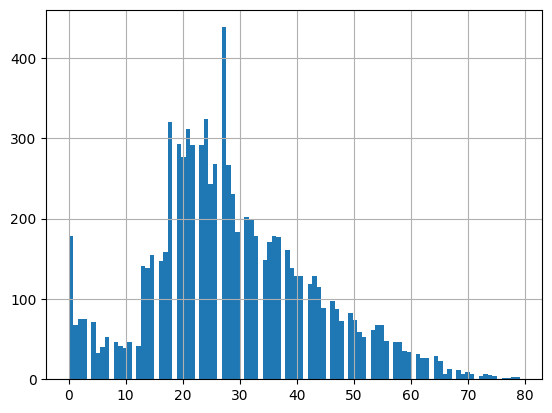

In [ ]:
train_df['Age'].hist(bins=100)

<Axes: >

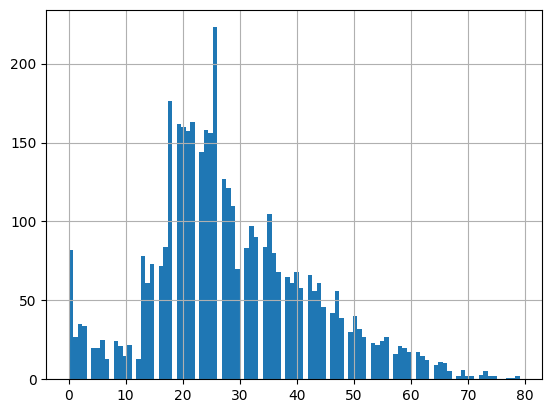

In [ ]:
test_df['Age'].hist(bins=100)

<Axes: >

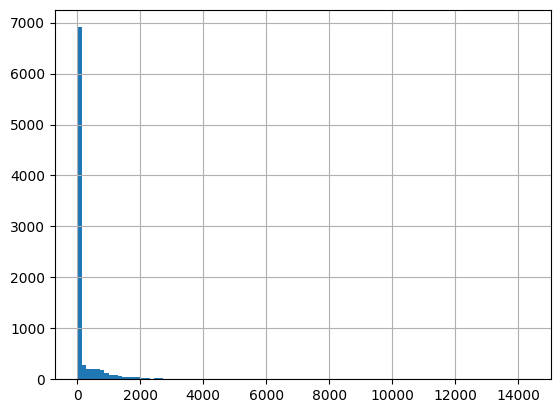

In [ ]:
train_df['RoomService'].hist(bins=100)

<Axes: >

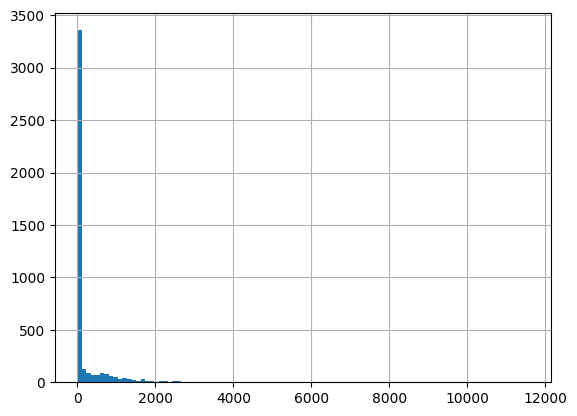

In [ ]:
test_df['RoomService'].hist(bins=100)

<Axes: >

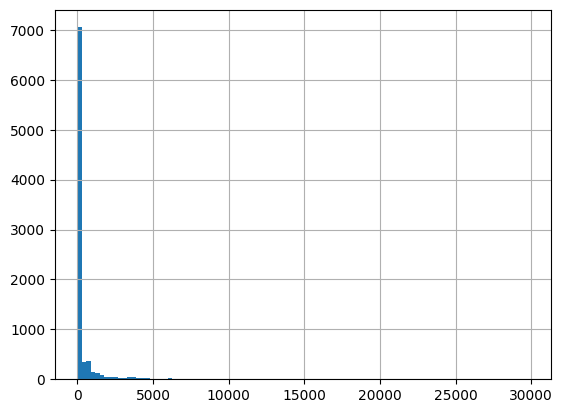

In [ ]:
train_df['FoodCourt'].hist(bins=100)

<Axes: >

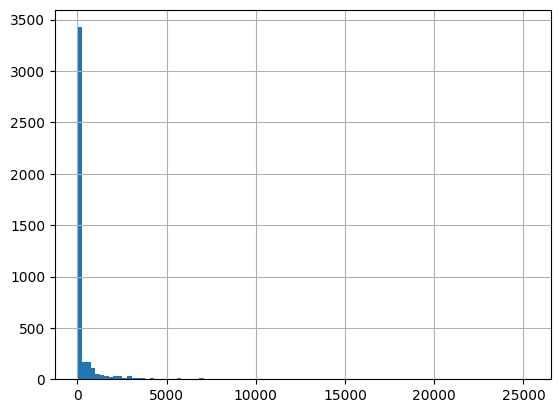

In [ ]:
test_df['FoodCourt'].hist(bins=100)

<Axes: >

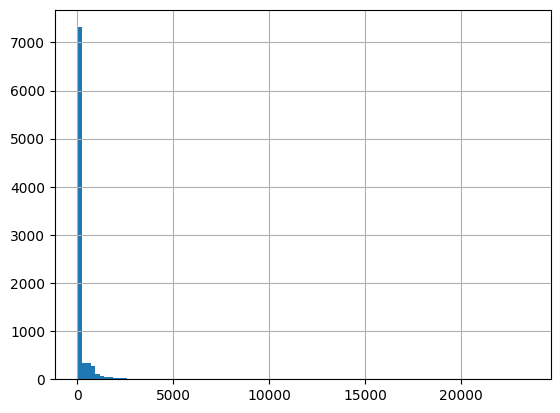

In [ ]:
train_df['ShoppingMall'].hist(bins=100)

<Axes: >

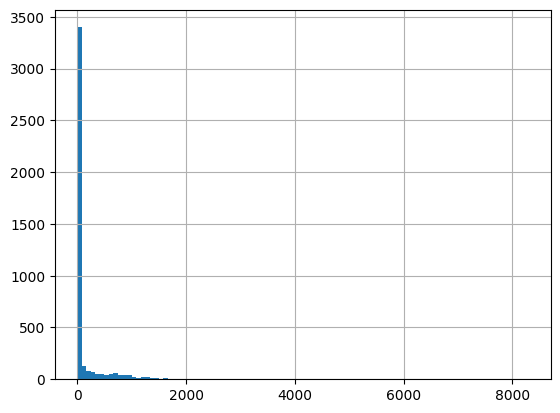

In [ ]:
test_df['ShoppingMall'].hist(bins=100)

<Axes: >

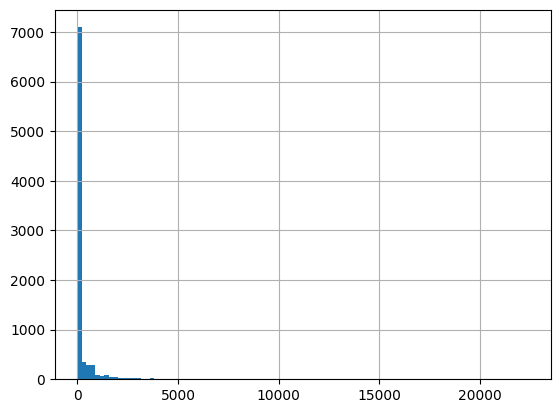

In [ ]:
train_df['Spa'].hist(bins=100)

<Axes: >

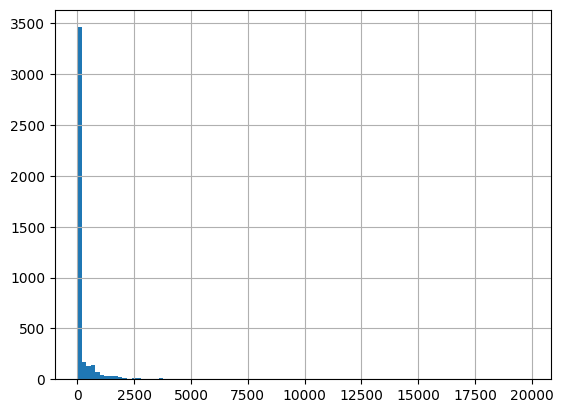

In [ ]:
test_df['Spa'].hist(bins=100)

<Axes: >

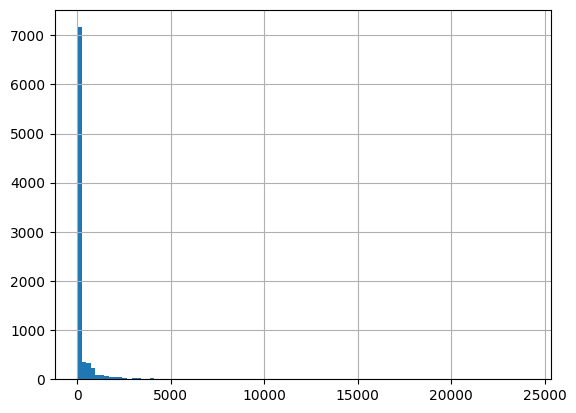

In [ ]:
train_df['VRDeck'].hist(bins=100)

<Axes: >

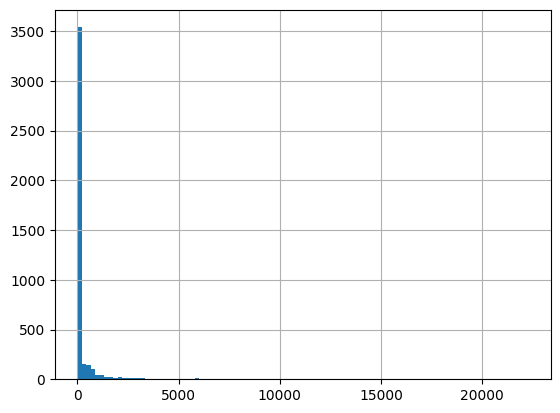

In [ ]:
test_df['VRDeck'].hist(bins=100)

In [ ]:
for dataset in all_data:
   dataset['AgeBin'] = pd.cut(dataset['Age'], bins=[0,12,20,60,90], labels=['Child', 'Teenage', 'Adult', 'Elder'], include_lowest=True)
   dataset['RoomServiceBin'] = pd.cut(dataset['RoomService'], bins=[0,100,500,1000,3000,16000], labels=['LittleOrNone', 'LittleToAverage', 'Average', 'AverageToALot', 'ALot'], include_lowest=True)
   dataset['FoodCourtBin'] = pd.cut(dataset['FoodCourt'], bins=[0,500,1000,2000,3000,4000,5000,35000], labels=['LittleOrNone', 'LittleToBelowAverage', 'BelowAverage', 'Average', 'AboveAverage', 'AboveAverageToALot', 'ALot'], include_lowest=True)
   dataset['ShoppingMallBin'] = pd.cut(dataset['ShoppingMall'], bins=[0,100,500,1000,2000,3000,5000,25000], labels=['LittleOrNone', 'LittleToBelowAverage', 'BelowAverage', 'Average', 'AboveAverage', 'AboveAverageToALot', 'ALot'], include_lowest=True)
   dataset['SpaBin'] = pd.cut(dataset['Spa'], bins=[0,100,500,1000,2000,3000,5000,25000], labels=['LittleOrNone', 'LittleToBelowAverage', 'BelowAverage', 'Average', 'AboveAverage', 'AboveAverageToALot', 'ALot'], include_lowest=True)
   dataset['VRDeckBin'] = pd.cut(dataset['VRDeck'], bins=[0,100,500,1000,2000,3000,5000,25000], labels=['LittleOrNone', 'LittleToBelowAverage', 'BelowAverage', 'Average', 'AboveAverage', 'AboveAverageToALot', 'ALot'], include_lowest=True)

In [ ]:
all_data

[     PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
 0        0001_01     Europa      False     B/0/P    TRAPPIST-1e  39.0  False   
 1        0002_01      Earth      False     F/0/S    TRAPPIST-1e  24.0  False   
 2        0003_01     Europa      False     A/0/S    TRAPPIST-1e  58.0   True   
 3        0003_02     Europa      False     A/0/S    TRAPPIST-1e  33.0  False   
 4        0004_01      Earth      False     F/1/S    TRAPPIST-1e  16.0  False   
 ...          ...        ...        ...       ...            ...   ...    ...   
 8688     9276_01     Europa      False    A/98/P    55 Cancri e  41.0   True   
 8689     9278_01      Earth       True  G/1499/S  PSO J318.5-22  18.0  False   
 8690     9279_01      Earth      False  G/1500/S    TRAPPIST-1e  26.0  False   
 8691     9280_01     Europa      False   E/608/S    55 Cancri e  32.0  False   
 8692     9280_02     Europa      False   E/608/S    TRAPPIST-1e  44.0  False   
 
       RoomService  FoodCo

In [ ]:
pass_id = test_df['PassengerId']

In [ ]:
train_df.columns.values.tolist()

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported',
 'Cabin_Deck',
 'Cabin_Side',
 'Group',
 'GroupSize',
 'AgeBin',
 'RoomServiceBin',
 'FoodCourtBin',
 'ShoppingMallBin',
 'SpaBin',
 'VRDeckBin']

In [ ]:
for dataset in all_data:
  drop_column=['PassengerId', 'Cabin', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
  dataset.drop(drop_column, axis=1, inplace=True)

In [ ]:
train_df.columns.values.tolist()

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Transported',
 'Cabin_Deck',
 'Cabin_Side',
 'Group',
 'GroupSize',
 'AgeBin',
 'RoomServiceBin',
 'FoodCourtBin',
 'ShoppingMallBin',
 'SpaBin',
 'VRDeckBin']

In [ ]:
all_data

[     HomePlanet  CryoSleep    Destination    VIP  Transported Cabin_Deck  \
 0        Europa      False    TRAPPIST-1e  False        False          B   
 1         Earth      False    TRAPPIST-1e  False         True          F   
 2        Europa      False    TRAPPIST-1e   True        False          A   
 3        Europa      False    TRAPPIST-1e  False        False          A   
 4         Earth      False    TRAPPIST-1e  False         True          F   
 ...         ...        ...            ...    ...          ...        ...   
 8688     Europa      False    55 Cancri e   True        False          A   
 8689      Earth       True  PSO J318.5-22  False        False          G   
 8690      Earth      False    TRAPPIST-1e  False         True          G   
 8691     Europa      False    55 Cancri e  False        False          E   
 8692     Europa      False    TRAPPIST-1e  False         True          E   
 
      Cabin_Side Group  GroupSize   AgeBin   RoomServiceBin  \
 0         

In [ ]:
train_df.head(10)

,HomePlanet,CryoSleep,Destination,VIP,Transported,Cabin_Deck,Cabin_Side,Group,GroupSize,AgeBin,RoomServiceBin,FoodCourtBin,ShoppingMallBin,SpaBin,VRDeckBin
0,Europa,False,TRAPPIST-1e,False,False,B,P,0001,1,Adult,LittleOrNone,LittleOrNone,LittleOrNone,LittleOrNone,LittleOrNone
1,Earth,False,TRAPPIST-1e,False,True,F,S,0002,1,Adult,LittleToAverage,LittleOrNone,LittleOrNone,BelowAverage,LittleOrNone
2,Europa,False,TRAPPIST-1e,True,False,A,S,0003,2,Adult,LittleOrNone,AboveAverage,LittleOrNone,ALot,LittleOrNone
3,Europa,False,TRAPPIST-1e,False,False,A,S,0003,2,Adult,LittleOrNone,BelowAverage,LittleToBelowAverage,AboveAverageToALot,LittleToBelowAverage
4,Earth,False,TRAPPIST-1e,False,True,F,S,0004,1,Teenage,LittleToAverage,LittleOrNone,LittleToBelowAverage,BelowAverage,LittleOrNone
5,Earth,False,PSO J318.5-22,False,True,F,P,0005,1,Adult,LittleOrNone,LittleOrNone,LittleOrNone,LittleToBelowAverage,LittleOrNone
6,Earth,False,TRAPPIST-1e,False,True,F,S,0006,2,Adult,LittleOrNone,BelowAverage,LittleOrNone,LittleOrNone,LittleOrNone
7,Earth,True,TRAPPIST-1e,False,True,G,S,0006,2,Adult,LittleOrNone,LittleOrNone,LittleOrNone,LittleOrNone,LittleOrNone
8,Earth,False,TRAPPIST-1e,False,True,F,S,0007,1,Adult,LittleOrNone,LittleToBelowAverage,LittleOrNone,LittleToBelowAverage,LittleOrNone
9,Europa,True,55 Cancri e,False,True,B,P,0008,3,Teenage,LittleOrNone,LittleOrNone,LittleOrNone,LittleOrNone,LittleOrNone


In [ ]:
train_df = pd.get_dummies(train_df, columns=['HomePlanet', 'Destination', 'Cabin_Deck', 'Cabin_Side', 'Group', 'CryoSleep', 'VIP', 'AgeBin', 'RoomServiceBin', 'FoodCourtBin', 'ShoppingMallBin', 'SpaBin', 'VRDeckBin'], dtype=int)

In [ ]:
test_df = pd.get_dummies(test_df, columns=['HomePlanet', 'Destination', 'Cabin_Deck', 'Cabin_Side', 'Group', 'CryoSleep', 'VIP', 'AgeBin', 'RoomServiceBin', 'FoodCourtBin', 'ShoppingMallBin', 'SpaBin', 'VRDeckBin'], dtype=int)

In [ ]:
train_df

,Transported,GroupSize,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_Deck_A,Cabin_Deck_B,...,SpaBin_AboveAverage,SpaBin_AboveAverageToALot,SpaBin_ALot,VRDeckBin_LittleOrNone,VRDeckBin_LittleToBelowAverage,VRDeckBin_BelowAverage,VRDeckBin_Average,VRDeckBin_AboveAverage,VRDeckBin_AboveAverageToALot,VRDeckBin_ALot
0,False,1,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,True,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,False,2,0,1,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,0
3,False,2,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
4,True,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
8689,False,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8690,True,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8691,False,2,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
test_df

,GroupSize,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,...,SpaBin_AboveAverage,SpaBin_AboveAverageToALot,SpaBin_ALot,VRDeckBin_LittleOrNone,VRDeckBin_LittleToBelowAverage,VRDeckBin_BelowAverage,VRDeckBin_Average,VRDeckBin_AboveAverage,VRDeckBin_AboveAverageToALot,VRDeckBin_ALot
0,1,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4273,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4274,1,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4275,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
train_df, test_df = train_df.align(test_df, join='outer', axis=1, fill_value=0)
train_X = train_df.drop('Transported', axis=1)

In [ ]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Columns: 9338 entries, AgeBin_Adult to VRDeckBin_LittleToBelowAverage
dtypes: int64(9338)
memory usage: 619.3 MB


In [ ]:
train_Y = train_df['Transported'].astype('int64')

In [ ]:
train_Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8693 entries, 0 to 8692
Series name: Transported
Non-Null Count  Dtype
--------------  -----
8693 non-null   int64
dtypes: int64(1)
memory usage: 68.0 KB


In [ ]:
test_X = test_df.drop('Transported', axis=1) # Transported has to be dropped as the result of train_df.align
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Columns: 9338 entries, AgeBin_Adult to VRDeckBin_LittleToBelowAverage
dtypes: int64(9338)
memory usage: 304.7 MB


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import keras

In [ ]:
def space_titanic():
  model = Sequential([
      Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(train_X.shape[1],)),
      Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      Dense(1, activation='sigmoid')
  ])
  return model

In [ ]:
model = space_titanic()

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(train_X, train_Y, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
109/109 [==============================] - 5s 30ms/step - loss: 1.0533 - accuracy: 0.7509 - val_loss: 0.7220 - val_accuracy: 0.7844
Epoch 2/50
109/109 [==============================] - 3s 25ms/step - loss: 0.6646 - accuracy: 0.7836 - val_loss: 0.5921 - val_accuracy: 0.7844
Epoch 3/50
109/109 [==============================] - 2s 18ms/step - loss: 0.5857 - accuracy: 0.7854 - val_loss: 0.5488 - val_accuracy: 0.7890
Epoch 4/50
109/109 [==============================] - 2s 17ms/step - loss: 0.5558 - accuracy: 0.7879 - val_loss: 0.5458 - val_accuracy: 0.7884
Epoch 5/50
109/109 [==============================] - 3s 27ms/step - loss: 0.5430 - accuracy: 0.7918 - val_loss: 0.5318 - val_accuracy: 0.7953
Epoch 6/50
109/109 [==============================] - 2s 21ms/step - loss: 0.5364 - accuracy: 0.7932 - val_loss: 0.5148 - val_accuracy: 0.8005
Epoch 7/50
109/109 [==============================] - 2s 17ms/step - loss: 0.5320 - accuracy: 0.7928 - val_loss: 0.5114 - val_accuracy: 0.7947

In [ ]:
pred = model.predict(test_X)

134/134 [==============================] - 1s 4ms/step


In [ ]:
pred01 = np.where(pred<0.5, 0,1)

In [ ]:
df=pd.DataFrame(pred01)
df

,0
0,1
1,0
2,1
3,1
4,1
...,...
4272,1
4273,0
4274,1
4275,1


In [ ]:
submission = pd.DataFrame({"PassengerId": pass_id, "Transported": np.where(df[0] == 0, False, True) })
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
submission.to_csv("space-titanic.csv", index=False)